# **Design, development, testing and finalization of graphic display functions**

# R, F, M $k$-Means all in one

## RFM data

In [8]:
import pandas as pd
from olist_commons import (
    get_last_order_date,
    get_customer_RFM,
)

crfm = get_customer_RFM(
    relative_to_date=get_last_order_date()
)
display(crfm.sort_values(by='R'))

# removing outliers
crfm_1 = crfm[(crfm.F < 8) & (crfm.M < 10_000)]

,R,F,M
customer_id,,,
87ab9fec999db8bd5774917de3cdf01c,0.000000,1,89.71
262e1f1e26e92e86375f86840b4ffd63,0.884907,2,444.06
af5454198a97379394cacf676e1e96cb,13.940845,3,592.65
634420a0ea42302205032ed44ac7fccc,16.083437,2,160.76
9bb92bebd4cb7511e1a02d5e50bc4655,18.345312,1,137.03
...,...,...,...
0eb1ee9dba87f5b36b4613a65074337c,744.807245,1,109.34
830d5b7aaa3b6f1e9ad63703bec97d23,762.217824,1,0.00
009b0127b727ab0ba422f6d9604487c7,764.087488,1,40.95


## K-Means

### Not scaled

In [9]:
from olist_commons import kmeans_clustering
k = 3
(
    kmeans, clu_labels, clu_centers, km_t
) = kmeans_clustering(crfm_1, k)
display(clu_labels)
display(clu_centers)

array([1, 1, 0, ..., 0, 1, 0])

array([[4.37553144e+02, 1.02797362e+00, 1.32196006e+02],
       [1.77455932e+02, 1.03411202e+00, 1.35732119e+02],
       [2.92188675e+02, 1.11876485e+00, 1.05308075e+03]])

### Scaled

In [10]:
from olist_commons import kmeans_clustering
k = 3
(
    kmeans_norm, clu_labels_norm, clu_centers_norm, km_t_norm
) = kmeans_clustering(crfm_1, k, normalize=True)
display(clu_labels_norm)
display(clu_centers_norm)

array([0, 0, 1, ..., 1, 0, 1])

array([[-0.71977201, -0.16734976, -0.02733881],
       [ 0.97764797, -0.16734976, -0.01605109],
       [-0.12614766,  5.19303026,  0.69898403]])

## Plot clusters RFM 2D

### First version

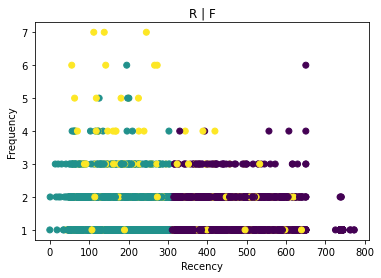

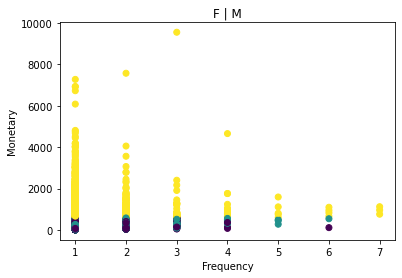

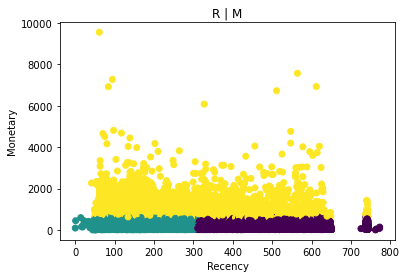

In [11]:
from olist_commons import plot_clusters_2d_v1
rfm = r, f, m = crfm_1.R, crfm_1.F, crfm_1.M
rfm_labels = r_label, f_label, m_label = 'Recency', 'Frequency', 'Monetary'
plot_clusters_2d_v1(r, f, 'R | F', r_label, f_label, clu_labels)
plot_clusters_2d_v1(f, m, 'F | M', f_label, m_label, clu_labels)
plot_clusters_2d_v1(r, m, 'R | M', r_label, m_label, clu_labels)

### Second version

#### RM projection

In [12]:
import matplotlib.pyplot as plt
from olist_commons import plot_clusters_2d
def plot_clusters_rm_proj(k, rfm, rfm_labels, clu_labels, clu_centers):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    plt.semilogy()
    plot_clusters_2d(
        ax, f'RM ({k} clusters)',
        xy=[r, m], xy_labels=[r_label, m_label],
        xy_clu_centers=[clu_centers[:, 0], clu_centers[:, 2]],
        clu_labels=clu_labels
    )


def plot_clusters_rf_proj(k, rfm, rfm_labels, clu_labels, clu_centers):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    plot_clusters_2d(
        ax, f'RF ({k} clusters)',
        xy=[r, f], xy_labels=[r_label, f_label],
        xy_clu_centers=[clu_centers[:, 0], clu_centers[:, 1]],
        clu_labels=clu_labels
    )


def plot_clusters_fm_proj(k, rfm, rfm_labels, clu_labels, clu_centers):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    plt.semilogy()
    plot_clusters_2d(
        ax, f'FM ({k} clusters)',
        xy=[f, m], xy_labels=[f_label, m_label],
        xy_clu_centers=[clu_centers[:, 1], clu_centers[:, 2]],
        clu_labels=clu_labels
    )

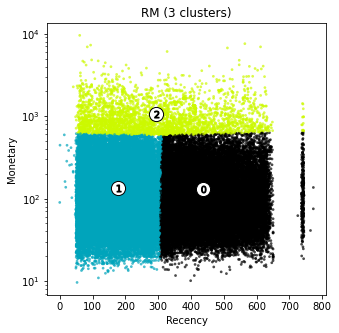

In [13]:
plot_clusters_rm_proj(k, rfm, rfm_labels, clu_labels, clu_centers)

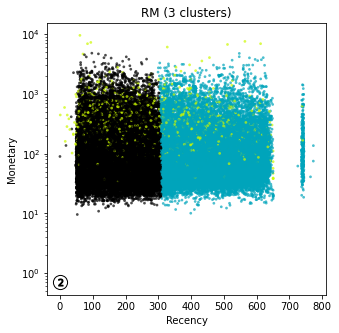

In [14]:
plot_clusters_rm_proj(k, rfm, rfm_labels, clu_labels_norm, clu_centers_norm)

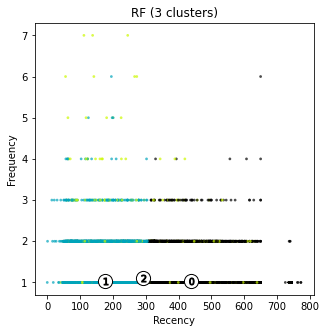

In [15]:
plot_clusters_rf_proj(k, rfm, rfm_labels, clu_labels, clu_centers)

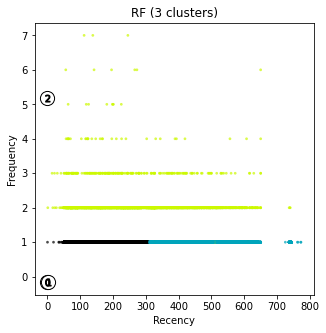

In [16]:
plot_clusters_rf_proj(k, rfm, rfm_labels, clu_labels_norm, clu_centers_norm)

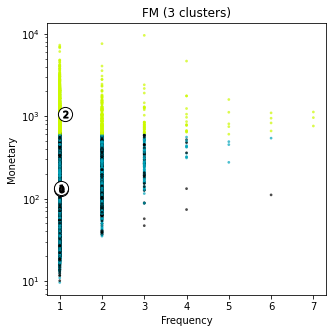

In [17]:
plot_clusters_fm_proj(k, rfm, rfm_labels, clu_labels, clu_centers)

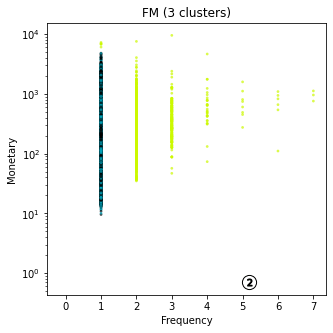

In [18]:
plot_clusters_fm_proj(k, rfm, rfm_labels, clu_labels_norm, clu_centers_norm)

## Plot clusters RFM 3D

In [20]:
rfm, rmf, fmr, frm, mrf, mfr = (
    [r, f, m], [r, m, f], [f, m, r],
    [f, r, m], [m, r, f], [m, f, r]
)
(
    rfm_labels, rmf_labels, fmr_labels,
    frm_labels, mrf_labels, mfr_labels
) = (
    [r_label, f_label, m_label], [r_label, m_label, f_label],
    [f_label, m_label, r_label], [f_label, r_label, m_label],
    [m_label, r_label, f_label], [m_label, f_label, r_label],
)

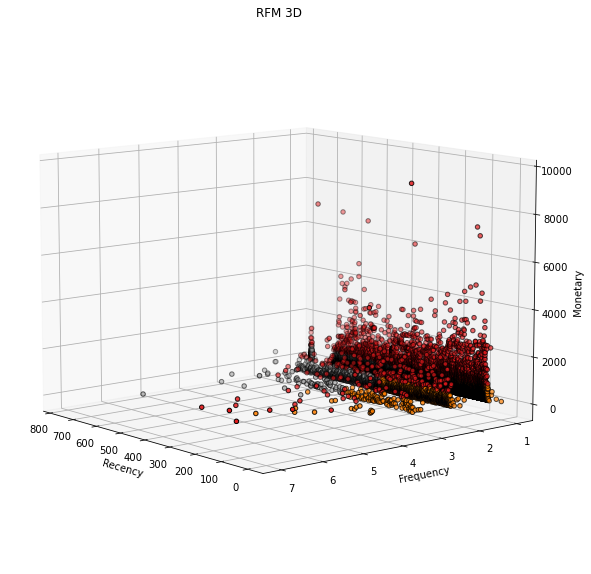

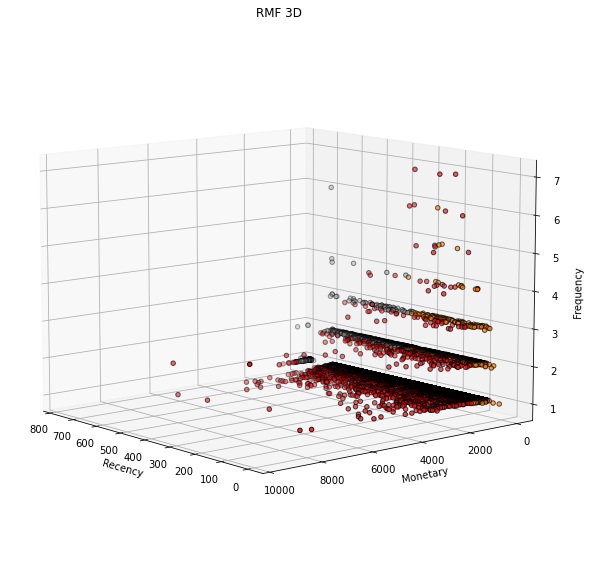

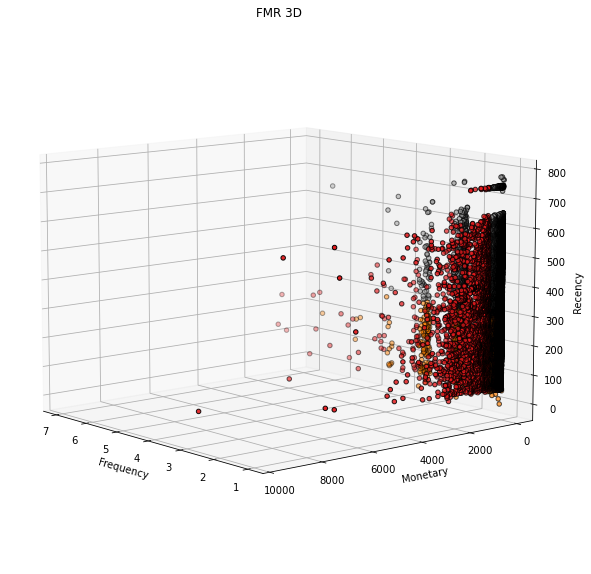

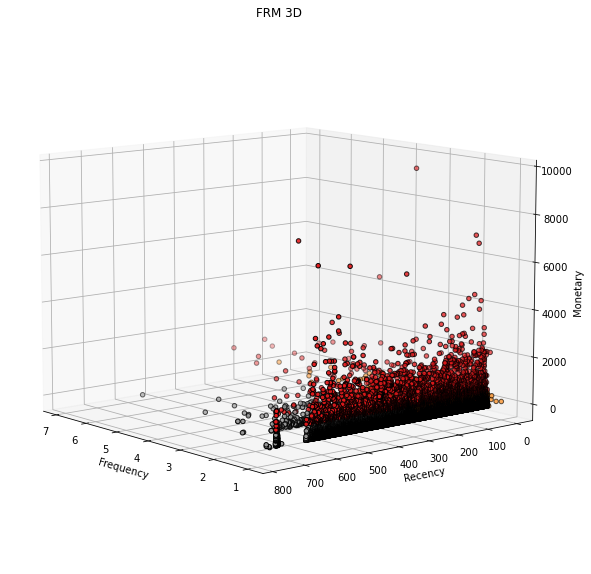

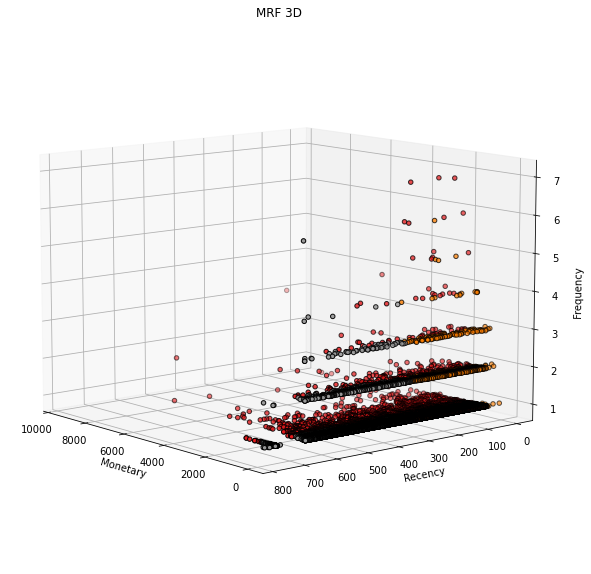

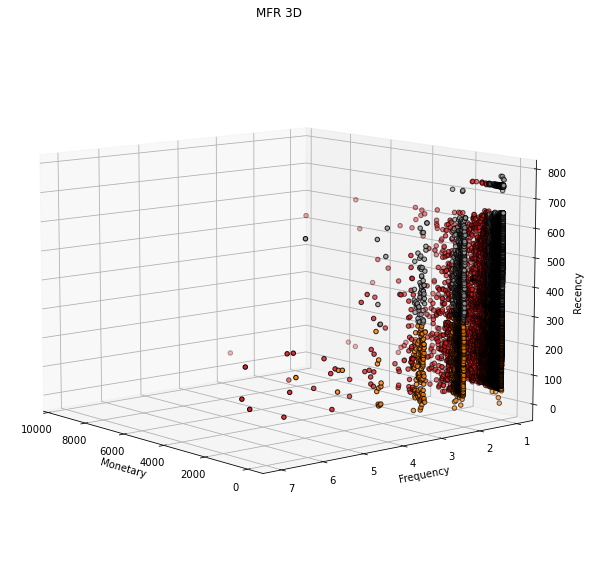

In [21]:
from olist_commons import plot_clusters_3d_v1
plot_clusters_3d_v1(rfm, rfm_labels, clu_labels, 'RFM 3D', (10, 10))
plot_clusters_3d_v1(rmf, rmf_labels, clu_labels, 'RMF 3D', (10, 10))
plot_clusters_3d_v1(fmr, fmr_labels, clu_labels, 'FMR 3D', (10, 10))
plot_clusters_3d_v1(frm, frm_labels, clu_labels, 'FRM 3D', (10, 10))
plot_clusters_3d_v1(mrf, mrf_labels, clu_labels, 'MRF 3D', (10, 10))
plot_clusters_3d_v1(mfr, mfr_labels, clu_labels, 'MFR 3D', (10, 10))

The RMF Plot is the best :

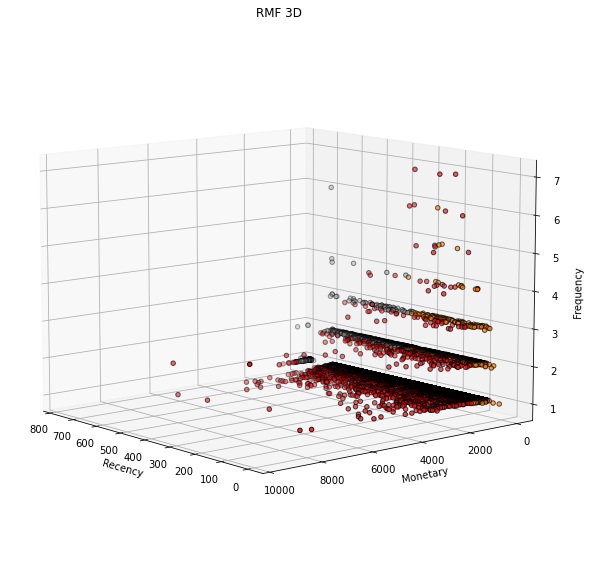

In [22]:
plot_clusters_3d_v1(rmf, rmf_labels, clu_labels, 'RMF 3D', (10, 10))

### Second version

In [23]:
import matplotlib.pyplot as plt
from olist_commons import plot_clusters_3d
def plot_clusters_rfm(k, rfm, rfm_labels, clu_labels): #, clu_centers):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.subplot(111, projection='3d', elev=10, azim=140)
    plot_clusters_3d(
        ax=ax,
        title=f'RMF 3D ({k} clusters)',
        xyz=[r, m, f],
        xyz_labels=[r_label, m_label, f_label],
        clu_labels=clu_labels,
    )

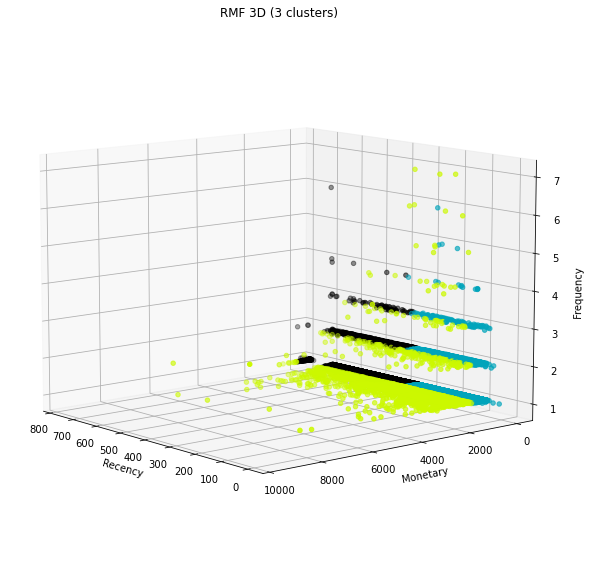

In [24]:
plot_clusters_rfm(k, rfm, rfm_labels, clu_labels)

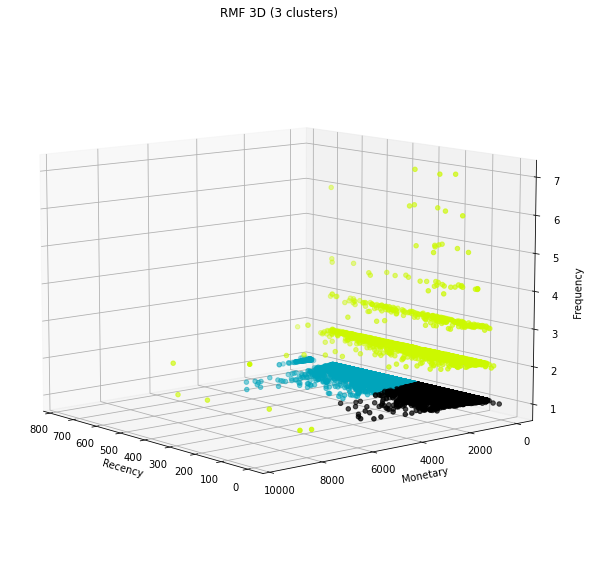

In [25]:
plot_clusters_rfm(k, rfm, rfm_labels, clu_labels_norm)

## Plot Silhouette

In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score
slh_avg = silhouette_score(crfm_1, clu_labels)
slh_avg_norm = silhouette_score(crfm_1, clu_labels_norm)
print('Average silhouette score :', slh_avg)
print('Average silhouette score (normalized) :', slh_avg_norm)
# Compute the silhouette scores for each sample
slh_vals = silhouette_samples(crfm_1, clu_labels)
slh_vals_norm = silhouette_samples(crfm_1, clu_labels_norm)

Average silhouette score : 0.4346383244775659
Average silhouette score (normalized) : 0.3367738153586967


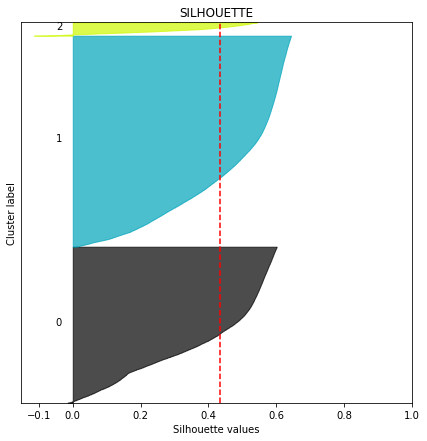

In [27]:
from olist_commons import plot_silhouette
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 7)
plot_silhouette(ax, slh_avg, slh_vals, clu_labels)

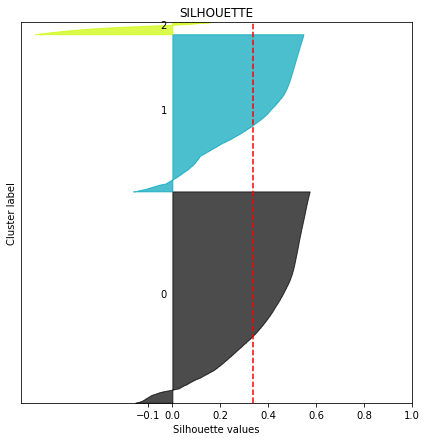

In [28]:
from olist_commons import plot_silhouette
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 7)
plot_silhouette(ax, slh_avg_norm, slh_vals_norm, clu_labels_norm)

## All in one

In [29]:
import numpy as np

def plot_kmeans_rfm_clusters_v2(
        rfm, rfm_labels,
        clu_labels, clu_centers,
        slh_avg, slh_vals
):
    """Plot the K-Means clustering results for the RFM features.

    Parameters:
    - rfm (list): The RFM features as a list of 3 elements (r, f, m).
    - rfm_labels (list): The RFM feature labels as a list of 3 elements
      (r_label, f_label, m_label).
    - rfm_centers (list): The RFM feature clusters centers as a list of 3
      elements (r_centers, f_centers, m_centers).
    - clu_labels (array): The cluster labels for each sample.
    - slh_avg (float): The average silhouette score for all the samples.
    - slh_vals (array): The silhouette score for each sample.
    """
    n_clusters = len(np.unique(clu_labels))
    r, f, m = rfm[0], rfm[1], rfm[2]
    r_label, f_label, m_label = rfm_labels[0], rfm_labels[1], rfm_labels[2]
    r_centers, f_centers, m_centers = (
        clu_centers[:, 0],
        clu_centers[:, 1],
        clu_centers[:, 2],
    )

    # fig = 
    plt.figure(figsize=(15, 7))

    ax1 = plt.subplot2grid(
        (2, 4), (0, 0),
        colspan=2, rowspan=2,
        projection='3d', elev=10, azim=140
    )
    ax2 = plt.subplot2grid((2, 4), (0, 2))
    ax3 = plt.subplot2grid((2, 4), (0, 3))
    ax4 = plt.subplot2grid((2, 4), (1, 2))
    ax5 = plt.subplot2grid((2, 4), (1, 3))

    plot_clusters_3d(
        ax=ax1,
        title=f'RMF 3D',
        xyz=[r, m, f],
        xyz_labels=[r_label, m_label, f_label],
        clu_labels=clu_labels,
    )

    plot_silhouette(ax2, slh_avg, slh_vals, clu_labels)

    ax3.semilogy()
    plot_clusters_2d(
        ax3, 'RM',
        xy=[r, m], xy_labels=[r_label, m_label],
        xy_clu_centers=[r_centers, m_centers],
        clu_labels=clu_labels
    )

    plot_clusters_2d(
        ax4, 'FR',
        xy=[f, r], xy_labels=[f_label, r_label],
        xy_clu_centers=[f_centers, r_centers],
        clu_labels=clu_labels
    )

    ax5.semilogy()
    plot_clusters_2d(
        ax5, 'FM',
        xy=[f, m], xy_labels=[f_label, m_label],
        xy_clu_centers=[f_centers, m_centers],
        clu_labels=clu_labels
    )

    plt.tight_layout()

    plt.suptitle(
        f'{n_clusters}-Means clusters',
        fontsize=14,
        fontweight='bold',
        y=1.05,
    )
    plt.show()


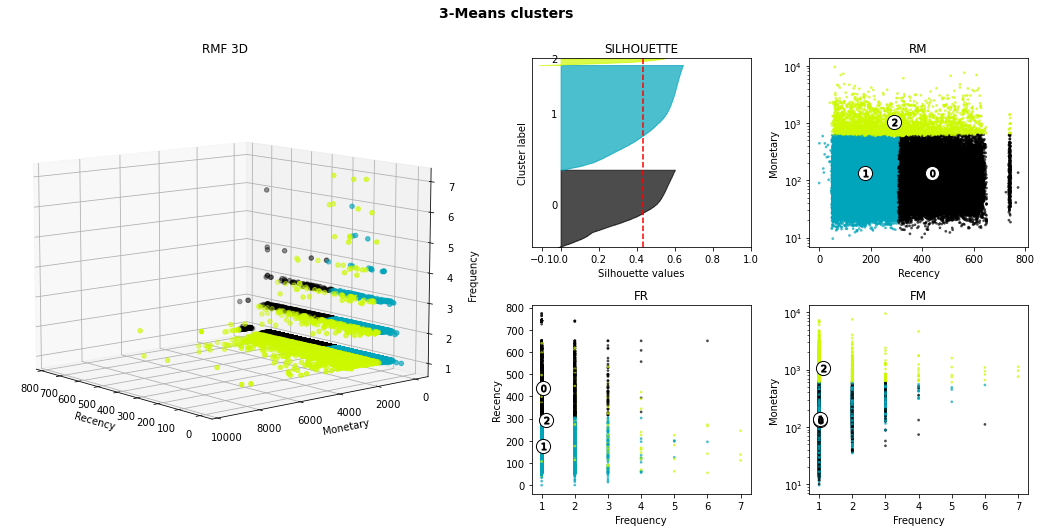

In [30]:
plot_kmeans_rfm_clusters_v2(
        rfm, rfm_labels,
        clu_labels, clu_centers,
        slh_avg, slh_vals
)

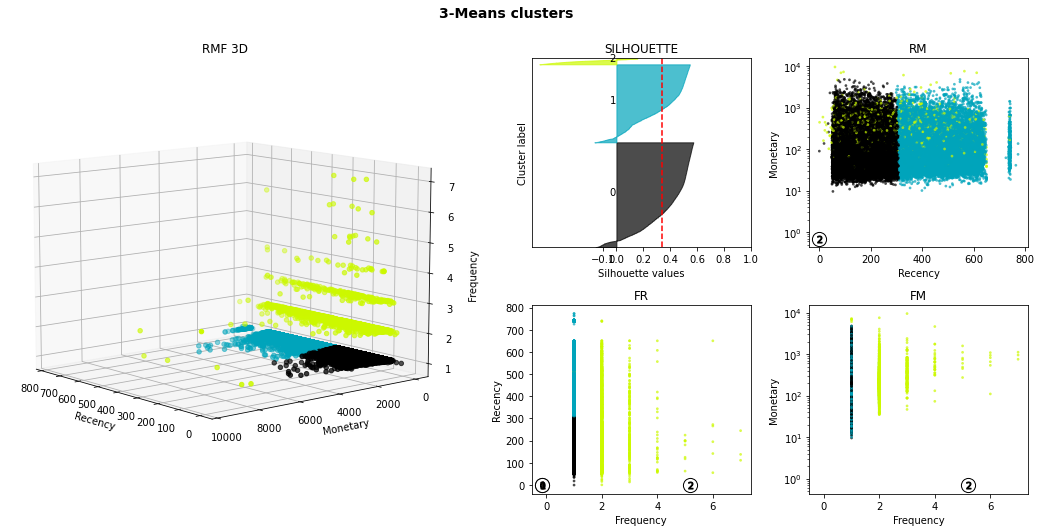

In [31]:
plot_kmeans_rfm_clusters_v2(
        rfm, rfm_labels,
        clu_labels_norm, clu_centers_norm,
        slh_avg_norm, slh_vals_norm
)